In [1]:
pip install --upgrade keras

DEPRECATION: keras-notify 0.0.1 has a non-standard dependency specifier tensorflow>=2requests>=2. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of keras-notify or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
data_dir=r"C:\Users\HARIKA PENCHALA\Desktop\surface crack detection\data"
categories=['negative','positive']

In [3]:
from PIL import Image

In [4]:
pip install Pillow

Note: you may need to restart the kernel to use updated packages.


DEPRECATION: keras-notify 0.0.1 has a non-standard dependency specifier tensorflow>=2requests>=2. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of keras-notify or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pandas as pd
from sklearn.model_selection import train_test_split

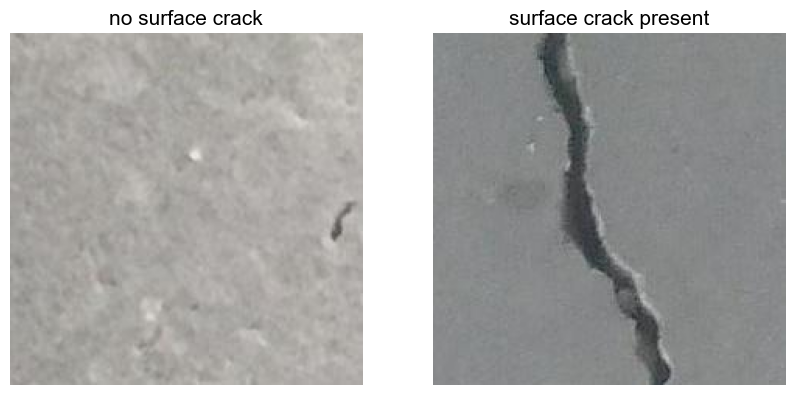

In [6]:
#two types of images present
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
sns.set_style("whitegrid")

headings=['no surface crack', 'surface crack present']

for i, cat in enumerate(categories):
  #get the path to one image in the category
  img_path = os.path.join(data_dir, cat, os.listdir(os.path.join(data_dir, cat))[0])

  #load the image and plot it
  img = Image.open(img_path)
  ax = axs[i]
  ax.imshow(img)
  ax.axis('off')
  ax.set_title(headings[i], fontsize=15)
plt.show()

In [7]:
image_height = 227
image_width = 227
TRAINING_EPOCHS = 10
BATCH_SIZE = 64

In [8]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [9]:
base_datset = image_dataset_from_directory(
    data_dir,
    image_size = (image_height, image_width),
    crop_to_aspect_ratio = True,
    shuffle = False,
    batch_size = 32)

Found 4492 files belonging to 2 classes.


In [10]:
#creating a database of our images
base_df = pd.DataFrame({'fullpaths': base_datset.file_paths})


def get_label(fullpath):
    if base_datset.class_names[1] in fullpath:
        return base_datset.class_names[1]
    else:
        return base_datset.class_names[0]
    
base_df['labels'] = base_df['fullpaths'].apply(get_label)
base_df['filepaths'] = base_df['fullpaths'].str.replace(data_dir,'')

pd.set_option('display.max_colwidth',None)

base_df

,fullpaths,labels,filepaths
0,C:\Users\HARIKA PENCHALA\Desktop\surface crack detection\data\Negative\00001.jpg,Negative,\Negative\00001.jpg
1,C:\Users\HARIKA PENCHALA\Desktop\surface crack detection\data\Negative\00002.jpg,Negative,\Negative\00002.jpg
2,C:\Users\HARIKA PENCHALA\Desktop\surface crack detection\data\Negative\00003.jpg,Negative,\Negative\00003.jpg
3,C:\Users\HARIKA PENCHALA\Desktop\surface crack detection\data\Negative\00004.jpg,Negative,\Negative\00004.jpg
4,C:\Users\HARIKA PENCHALA\Desktop\surface crack detection\data\Negative\00005.jpg,Negative,\Negative\00005.jpg
...,...,...,...
4487,C:\Users\HARIKA PENCHALA\Desktop\surface crack detection\data\Positive\01891.jpg,Positive,\Positive\01891.jpg
4488,C:\Users\HARIKA PENCHALA\Desktop\surface crack detection\data\Positive\01892.jpg,Positive,\Positive\01892.jpg
4489,C:\Users\HARIKA PENCHALA\Desktop\surface crack detection\data\Positive\01893.jpg,Positive,\Positive\01893.jpg
4490,C:\Users\HARIKA PENCHALA\Desktop\surface crack detection\data\Positive\01894.jpg,Positive,\Positive\01894.jpg


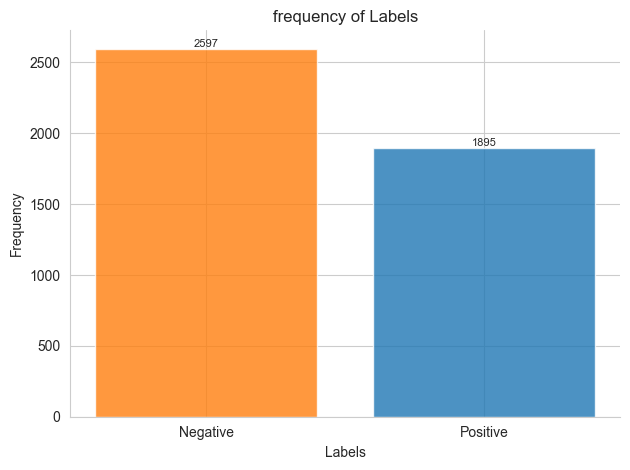

In [11]:
#calculate the frequency of labels
freq = base_df['labels'].value_counts()

#create a bar chart
plt.bar(freq.index, freq.values, color=['#FF7F0E', '#1F77B4'], alpha=0.8)

#set the title and labels
plt.title('frequency of Labels')
plt.xlabel('Labels')
plt.ylabel('Frequency')

#Add value labels above each bar
for i, v in enumerate(freq.values):
    plt.text(i, v,str(v), ha='center', va='bottom', fontsize=8)

#remove the top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

#rotate x-axis tick labels if necessary
plt.xticks(rotation=0)

#show the plot
plt.tight_layout()
plt.show()

In [12]:
#split the data into train and remaining data
train_df, remaining_df = train_test_split(base_df, train_size=0.6, random_state=42)

#split the remaining data into validation and test sets
valid_df, test_df = train_test_split(remaining_df, train_size=0.5, random_state=42)

In [13]:
#print the size of the train, validation, test sets
print("Train set size:", len(train_df))
print("Validation set size:", len(valid_df))
print("Test set size:", len(test_df))

Train set size: 2695
Validation set size: 898
Test set size: 899


In [14]:
#Importing Libraries
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten, BatchNormalization, GlobalAveragePooling2D
from keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.applications.inception_v3 import InceptionV3, preprocess_input
import os
import numpy as np
import seaborn as sns
from PIL import Image
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.utils import load_img, img_to_array
from keras.preprocessing import image
from keras.models import load_model
import keras
from sklearn.model_selection import train_test_split
import shutil
import numpy as np
import pandas as pd
from keras.utils import image_dataset_from_directory
import matplotlib.pyplot as plt
import tensorflow as tf

In [15]:
gen = ImageDataGenerator(rescale = 1./255.,
                                    shear_range = 0.2,
                                    zoom_range = 0.2,
                                    horizontal_flip = True)

In [16]:
test_gen = ImageDataGenerator(rescale=1/255.)

In [17]:
train_generator = gen.flow_from_dataframe(
                                       train_df, #dataframe
                                       directory = data_dir, #images data path
                                       x_col = 'fullpaths',
                                       y_col = 'labels',
                                       color_mode='rgb',
                                       target_size=(image_height, image_width),
                                       class_mode="categorical",
                                       batch_size = BATCH_SIZE,
                                       shuffle = True,
                                       seed = 42
                                       )

Found 2695 validated image filenames belonging to 2 classes.


In [18]:
validation_generator = gen.flow_from_dataframe(
                                       valid_df, #dataframe
                                       directory = data_dir, #images data path
                                       x_col = 'fullpaths',
                                       y_col = 'labels',
                                       color_mode='rgb',
                                       target_size=(image_height, image_width),
                                       class_mode="categorical",
                                       batch_size = BATCH_SIZE,
                                       shuffle = True,
                                       seed = 42
                                       )

Found 898 validated image filenames belonging to 2 classes.


In [19]:
test_generator = test_gen.flow_from_dataframe(
                                       test_df, #fataframe
                                       directory = data_dir, #images data path
                                       x_col = 'fullpaths',
                                       y_col = 'labels',
                                       color_mode='rgb',
                                       target_size=(image_height, image_width),
                                       class_mode="categorical",
                                       batch_size = BATCH_SIZE,
                                       shuffle = False,
                                       )

Found 899 validated image filenames belonging to 2 classes.


In [20]:
#load the InceptionV3 model
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(227, 227, 3))

In [21]:
#freeze the layers in the base model
for layer in base_model.layers:
    layer.trainable = False

In [22]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation = 'relu')(x)
x = Dropout(0.4)(x)
x = Dense(64, activation = 'relu')(x)
x = Dropout(0.2)(x)
x = Dense(2, activation='softmax')(x)

In [23]:
from tensorflow.keras.models import Model

In [24]:
model_incep = Model(inputs=base_model.input, outputs=x)

In [25]:
model_incep.compile(optimizer=tf.keras.optimizers.Adam(),
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

In [26]:
#train the model
image_model_info = model_incep.fit(
    train_generator,
    steps_per_epoch=len(train_generator) // 32,
    epochs=5,
    validation_data=validation_generator,
    validation_steps=len(validation_generator) // 32
)

Epoch 1/5


c:\Users\HARIKA PENCHALA\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1/1 ━━━━━━━━━━━━━━━━━━━━ 103s 103s/step - accuracy: 0.5000 - loss: 0.7518 - val_accuracy: 0.9254 - val_loss: 0.4341
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 56s 56s/step - accuracy: 0.7188 - loss: 0.5095 - val_accuracy: 0.9432 - val_loss: 0.2902
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 63s 63s/step - accuracy: 0.7031 - loss: 0.4716 - val_accuracy: 0.9800 - val_loss: 0.1737
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 56s 56s/step - accuracy: 0.9531 - loss: 0.2473 - val_accuracy: 0.9599 - val_loss: 0.1440
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 53s 53s/step - accuracy: 0.8906 - loss: 0.2772 - val_accuracy: 0.9621 - val_loss: 0.1142


In [27]:
res = tf.keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=(227,227,3))

In [28]:
#freeze the layers in the base model
for layer in res.layers:
    layer.trainable = False

In [29]:
x = res.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation = 'relu')(x)
x = Dropout(0.5)(x)
x = Dense(128, activation = 'relu')(x)
x = Dropout(0.4)(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(2, activation='softmax')(x)

In [30]:
#create the model
model_res = Model(inputs=res.input, outputs=x)

In [31]:
model_res.compile(optimizer=tf.keras.optimizers.Adam(),
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

In [32]:
#train the model
image_model_info_1 = model_res.fit(train_generator,
                                   steps_per_epoch=len(train_generator) // 32,
                                   epochs=5,
                                   validation_data=validation_generator,
                                   validation_steps=len(validation_generator) // 32)

Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 119s 119s/step - accuracy: 0.5714 - loss: 1.2853 - val_accuracy: 0.6080 - val_loss: 0.6571
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 97s 97s/step - accuracy: 0.4375 - loss: 0.9905 - val_accuracy: 0.3920 - val_loss: 0.7295
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 92s 92s/step - accuracy: 0.5000 - loss: 0.9114 - val_accuracy: 0.3920 - val_loss: 0.8303
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 99s 99s/step - accuracy: 0.6250 - loss: 0.7411 - val_accuracy: 0.3920 - val_loss: 0.8284
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 116s 116s/step - accuracy: 0.4531 - loss: 1.1779 - val_accuracy: 0.3920 - val_loss: 0.7099


In [33]:
#load the xception model
xcep = tf.keras.applications.Xception(weights='imagenet', include_top=False, input_shape=(227,227,3))

In [34]:
#freeze the layers in the base model
for layer in xcep.layers:
    layer.trainable = False

In [35]:
x = xcep.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation = 'relu')(x)
x = Dropout(0.4)(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(2, activation='softmax')(x)

In [36]:
#create the model
model_xcep = Model(inputs=xcep.input, outputs=x)

In [37]:
model_xcep.compile(optimizer=tf.keras.optimizers.Adam(),
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

In [38]:
#train the model
image_model_info_2 = model_xcep.fit(train_generator,
                                   steps_per_epoch=len(train_generator) // 32,
                                   epochs=5,
                                   validation_data=validation_generator,
                                   validation_steps=len(validation_generator) // 32)

Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 208s 208s/step - accuracy: 0.5156 - loss: 0.7028 - val_accuracy: 0.7695 - val_loss: 0.5866
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 154s 154s/step - accuracy: 0.7344 - loss: 0.5735 - val_accuracy: 0.8853 - val_loss: 0.4744
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 125s 125s/step - accuracy: 0.7500 - loss: 0.5380 - val_accuracy: 0.9766 - val_loss: 0.3854
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 105s 105s/step - accuracy: 0.9219 - loss: 0.3918 - val_accuracy: 0.9844 - val_loss: 0.3102
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 102s 102s/step - accuracy: 0.9375 - loss: 0.3532 - val_accuracy: 0.9889 - val_loss: 0.2195


In [39]:
model_incep.save('InceptionV3.h5')

In [40]:
#define the image size for the model
imagesize = [277,277]

class_labels = ['negative', 'positive']

#load the trained model 
model = load_model('InceptionV3.h5')

#load the image to predict
img_path = r"C:\Users\HARIKA PENCHALA\Desktop\surface crack detection\data\Negative\00005.jpg"

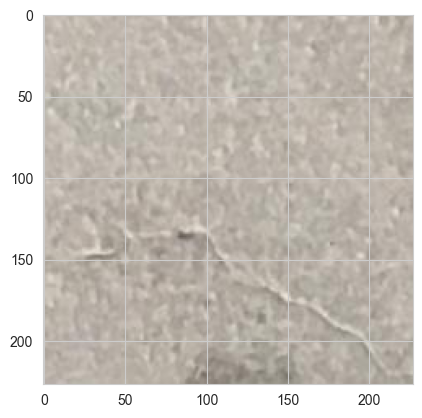

In [41]:
from PIL import Image

img = Image.open(img_path)
plt.imshow(img)
plt.show()

In [42]:
img = load_img(img_path, target_size=(227, 227))
x = img_to_array(img)
x = np.expand_dims(x, axis=0)

#preprocess the input image
x = tf.keras.applications.inception_v3.preprocess_input(x)

#make predictions
predictions = model.predict(x)
predicted_class = np.argmax(predictions[0])
predicted_label = class_labels[predicted_class]

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


In [43]:
#print the predicted class 
print("predicted class:", predicted_label)

predicted class: negative
